In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import os
import ipywidgets
from ipywidgets import AppLayout, Button, Layout, GridspecLayout
import geocoder
import numpy as np
import holoviews as hv
from holoviews import opts
from vega_datasets import data as vds
import json

In [116]:
#s = json.load( open("bmh_matplotlibrc.json") ) 
#plt.rcParams.update(s)

In [117]:
import geocoder

# Maldives Covid-19 Data Analytics Notebook

##### <font color=grey>by: Zaid Asad, xaid.asad@gmail.com, (twitter: @XaidAsad)</font>
***

##### I started this notebook out of sheer curiosity. This first started out as a project to understand the spread of an infectious disease in an island nation like Maldives. A number of friends that I share some of the work with, talked to me about the lack of graphical interpretation of the situation in Maldives. To remedy this & to quinch my knowledge thirst I started writing out this notebook. This is just for academic purposes & should never be used as a primary reference. For the latest updates & correct information refer to the concerned authorities.

In [144]:
confirmed_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_cases_file_link='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
country_cases_file_link='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv'

confirmed_df = pd.read_csv(confirmed_cases_file_link)
deaths_df = pd.read_csv(death_cases_file_link)
recovered_df = pd.read_csv(recovered_cases_file_link)
cases_country_df = pd.read_csv(country_cases_file_link)

fields = ['Confirmed', 'Deaths', 'Recovered']
dfs = dict()

dfs['Confirmed']=confirmed_df
dfs['Deaths']=deaths_df
dfs['Recovered']=recovered_df

for field, df in dfs.items():
    df = df.groupby('Country/Region', as_index=False).sum()
    df = df.melt(id_vars=['Country/Region', 'Lat', 'Long'],
                 value_name='Counts')
    df['Quantity'] = field
    df.columns =  ['Country', 'lat', 'lon', 'Date', 'Counts', 'Quantity']
    dfs[field] = df
    
    
dfall = pd.concat(dfs.values())
dfall['Date']=pd.to_datetime(dfall['Date'])

Temp_DF= dfall.loc[(dfall['Country'] == 'Maldives') & (dfall['Quantity']=='Confirmed')]
Confirmed_MV_num = Temp_DF.loc[Temp_DF.index[-1], "Counts"] - 12
Confirmed_MV_int = Confirmed_MV_num.item()

In [145]:
male_city = geocoder.osm('Male, Male')

In [146]:
male_city = geocoder.osm('Male, Maldives')
male_city_latlng = [male_city.lat, male_city.lng, Confirmed_MV_int*100]
AnantaraDhigu_latlng = [3.972120, 73.502166, 2*100]
Kuredu_latlng = [5.549685, 73.464947, 5*100]
Uligamu_latlng = [7.083112, 72.927289, 1*100]
Kuramathi_latlng = [4.259211, 72.981261, 2*100]
SandiesBathala_latlng = [4.070392, 72.945168, 2*100]

Guraidhoo_latlong=[3.9005, 73.4662, 0.5*100]
Kunaaveshi_latlong=[3.618649, 73.368975, 0.5*100]
Fulhadhoo_latlong=[4.885273, 72.930407, 0.5*100]
Kudahuvadhoo_latlong=[2.669849, 72.894417, 0.5*100]
Thulushdoo_latlong=[4.372680, 73.647569, 0.5*100]
KudaVilingili_latlong=[4.377711, 73.661995, 0.5*100]
ThulhagiriIsland_latlong=[4.311446, 73.487013, 0.5*100]

large_cities = [ThulhagiriIsland_latlong, KudaVilingili_latlong, Thulushdoo_latlong, Kudahuvadhoo_latlong, Fulhadhoo_latlong, Kunaaveshi_latlong, Guraidhoo_latlong, male_city_latlng, AnantaraDhigu_latlng, Kuredu_latlng, Uligamu_latlng, Kuramathi_latlng, SandiesBathala_latlng]

map_heatmap = folium.Map(location =(3.440859, 73.343591), zoom_start = 8)



In [147]:
male_mini_cases = pd.read_csv('male_mini.csv')

In [150]:
male_case_mini = px.bar(male_mini_cases, x='Date', y='Cases', color='Cases')

## Case Distributions in Maldives

In [199]:
Map_Figure = folium.Figure(width=600, height=1500)
plugins.HeatMap(large_cities).add_to(map_heatmap)

folium.Marker(location=[male_city.lat, male_city.lng], popup = "Male'", tooltip='Cases: 'and str(Confirmed_MV_int), icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[3.972120, 73.502166], popup = "K. Anantara Dhigu", tooltip='Cases: 2', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[5.549685, 73.464947], popup = "Lh. Kurehdhoo", tooltip='Cases: 5', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.259211, 72.981261], popup = "AA. Kuramathi", tooltip='Cases: 2', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.070392, 72.945168], popup = "AA. Sandies Bathala", tooltip='Cases: 2', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[3.9005, 73.4662], popup = "K. Guraidhoo", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[3.618649, 73.368975], popup = "V. Kunaaveshi", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.885273, 72.930407], popup = "B. Fulhadhoo", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[2.669849, 72.894417], popup = "Dh. Kudahuvadhoo", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.372680, 73.647569], popup = "K. Thulusdhoo", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.377711, 73.661995], popup = "K. Kuda Vilingili", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[4.311446, 73.487013], popup = "K.Thulhaagiri Island Resort", tooltip='Cases: 0, Monitoring', icon=folium.Icon(color='blue',icon='info-sign')).add_to(map_heatmap)
folium.Marker(location=[7.083112, 72.927289], popup = "HA. Uligan", tooltip='Cases: 1', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_heatmap)

Map_Figure.add_child(map_heatmap)

***

In [155]:
Monit_Map_Figure = folium.Figure(width=600, height=600)
Monit_Map = folium.Map(location=[4.1755, 73.5093],zoom_start=15)

## Data Analysis

The dataset is updated from the John Hopkins University github repository. This repository can be cloned in cmd (if you have git installed) 'git clone https://github.com/CSSEGISandData/COVID-19.git'. There are time series files that are updated every 24 hours.

The data has been processed using python, if you would like to know the libraries that I have used for processing, send me an e-mail and I will share the workings with you.

Note: All the date/day series for the axis, have all been started on the first day in the data set which is 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
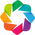

In [189]:
hv.extension('bokeh')

***

## A comparison of geo/pop categorically similar countries 

In [190]:
ds = hv.Dataset(dfall, kdims=['Country', 'Date', 'Quantity'], vdims=['Counts'])

In [191]:
dsel = ds.select(Country=['Maldives', 'Sri Lanka','Mauritius', 'Bahamas', 'Fiji'])

In [192]:
curves = dsel.to(hv.Curve, 'Date', 'Counts')
curves.opts(width=600, height =500)

:HoloMap   [Country,Quantity]
   :Curve   [Date]   (Counts)

In [193]:
curves.overlay('Quantity').opts(legend_position='top_left')

:HoloMap   [Country]
   :NdOverlay   [Quantity]
      :Curve   [Date]   (Counts)

In [194]:
bars = dsel.to(hv.Bars, ['Country','Quantity'], 'Counts')
bars.opts(width=400, height=400, stacked=False, xrotation=90)

:HoloMap   [Date]
   :Bars   [Country,Quantity]   (Counts)

***

## Statistical Modelling & Extrapolation

#### Simple Exponential Model 

De-void of external changes, the confirmed cases in any given country should be exponential, this is mostly true for the inital stages of the disease. In Maldives, as of the time of writing this (20-Apr-20), the cases are growing in number. It is safe to assume that the numbers will follow an exponential growth curve.

In a scenario like this, given a person $i$ there is a given probability $p(i)$ for $i $ to infect $k$ people. So if there are $ n(x) $ people infected at day $ x $, the additional number of infected $ \Delta{n(x)} $ between day $ x $ and day $ x + 1 $ is proportional to $ n: $

$$ \Delta{n}(x)=an(x)$$ 

Integration on $ x $:

$$\int \Delta{n}(x)= \int an(x)$$

$$ \ln (n) = ax $$

$$ n = e^{ax} $$

The date of infection initiation is not the same for all countries, therefore a delay parameter should be added to delay the exponential.

$$ n = e^{a(x-b)} $$

***

## Fitting the Model

The parameters $ (a,b) $, for a given country will be unique, by fitting the model to the data of the country, these two values can be extracted.

In [162]:
sel = dfall[(dfall['Country']=='Maldives') & (dfall['Quantity']=='Confirmed')]

In [163]:
y = sel['Counts']
x_date = pd.to_datetime(sel['Date'], format='%d/%m')

In [164]:
x = np.arange(len(y))
x[:10]
expo = lambda x, a, b : np.exp(a*(x-b))

In [165]:
#expo(np.arange(5), 1, 0)

In [166]:
from scipy.optimize import curve_fit
results = curve_fit(expo, x, y)

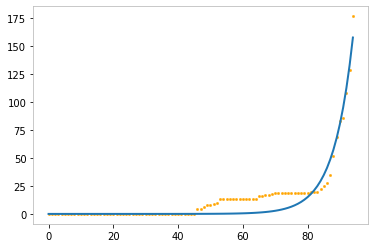

In [167]:
plt.scatter(x,y, s=5, color='orange')
Model_fit_fig = plt.plot(x, expo(x, *results[0]))

By fitting the number of confirmed cases of Maldives as a function of time, the parameters for Maldives can be found.

The confirmed cases count from the Johns Hopkins dataset is cleaned and extracted for analysis. For this, I have used 'numpy' library. Use the 'lambda' function togather with .exp, which is the numpy exponential function. Then by using 'optimize' from scipy library to perform the fit. The resulting graph is as follows, I have extrapolated out of the data point by 10 days, this is just to get an idea of the growth. It could be taken as a sort of forecast, but given the complexity of a disease spread, it would be premature to think of this as an absolute.

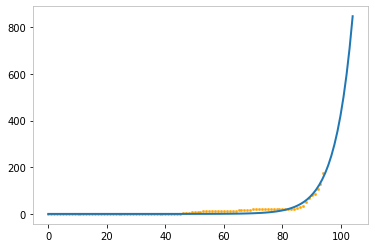

In [168]:
linx = np.linspace(0,x.max()+10,101)
plt.scatter(x,y, s=5, color='orange')
f = expo(linx, *results[0])
Model_extrplte = plt.plot(linx, f)

In [169]:
def plot(countries, xrange,
         dtype='Confirmed',
         yrange=None,
         yscale='linear'): 
    '''plot the covid-19 data with an exponential fit.
    - countries: list of countries
    - xrange: fit range, e.g. (30,55)
    - yscale: log or linear
    - yrange: well, y range, useful in log mode.
    '''
    xmin, xmax = xrange
    linx = np.linspace(xmin, xmax, 101)    
    colors = ['blue', 'red', 'orange', 'green']
    for i, country in enumerate(countries): 
        color = colors[i]
        sel = dfall[ (dfall['Country']==country) &
                 (dfall['Quantity']==dtype)]
        yp = sel['Counts'][xmin:xmax+1]
        xp = np.arange(len(yp))+xmin
        plt.scatter(xp, yp, label=country, 
                    alpha=0.7, marker='.', color=color)
        pars, cov = curve_fit(expo, xp, yp)
        f = expo(linx, *pars)
        plt.plot(linx, f, 
                 color=color, alpha=0.3)
    plt.legend(loc='upper left')
    plt.xlabel('Days')
    plt.ylabel('Confirmed Cases')
    plt.yscale(yscale)
    if yrange: 
        plt.ylim(*yrange)
    plt.grid()

The below compares some identical countries to Maldives, the gradient of the fitted line that Maldives is following seems to be a bit higher than other countries, this is interesting, it either means that the measures taken are not strong enough to slow the growth rate or that the situation is far worse than what is apparent. The extrapolation has been carried for only 10 days.

As with the spread of infectious diseases, there will come a time when if the epidemic goes unctrolled and affects a large amount of people, there will be a time where it be more difficult fo the disease to affect more people. This means that the parameter $ a $, which is the rate of infection, that has been fixed for the analysis will start decreasing. $ a $ is really a function of time, and the dependencies depend on complex social interactions, government interventions & scietific & medical breakthroughs. 

Lockdowns, quarantines & other confinement measures will inevitably decrease the spread of the disease. Maybe, the affect of confinement on the growth of the curve is very strong, countries that have taken these measures shows significant reduction in the number of confirmed cases overtime.

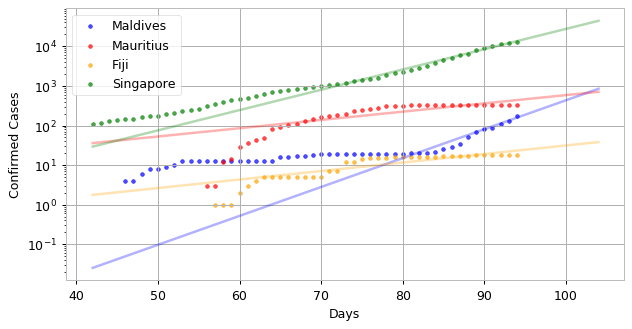

In [170]:
plt.figure(dpi=90, figsize=(8,4))
plot(['Maldives', 'Mauritius', 'Fiji','Singapore'], 
     dtype='Confirmed',
     xrange=(42, x.max()+10),
     yscale='log')

*** 

## Inputting Uncertainities

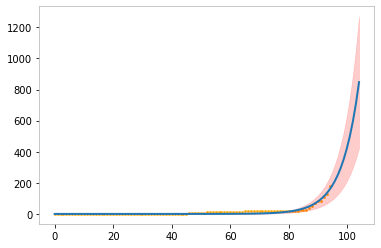

In [171]:
plt.scatter(x,y, s=5, color='orange')
plt.plot(linx,f)
Uncertain_band_fig =plt.fill_between(linx, f*(1+0.5), f*(1-0.5), alpha=0.2, color='red')

The above graph has been plotted with the same data as before, but I have added an uncertanity band. Uncertanity plays a huge role in mathematical models of complex real world problems, in this case, where we have an exponential growth, uncertanities can produce difference that are as large as 50%. Here I have added an uncertanity band of +/-50% for the prediction.


***

### Statistical Uncertainities

The best thing that could happen is, getting a perfect model which will predict all the outcomes of the disease given any day $ x $. But, I have no idea about the real model or the true function that fits the model. There is one form of uncertanity that always exist in the real world, those are statistical uncertanities. 

If we have a model that can predict the outcome for a given day, with a probability of 0.5, say that the prediction was for 10 cases in a day, in the actual enaction of the event, it could be 8, it could be 11. So each event is affected by uncertanities that eludes us from the true value. Simply put, we can put uncertanity on a number of count as;

$$ \Delta n= \sqrt{n} $$

Ucertanity for all counts:

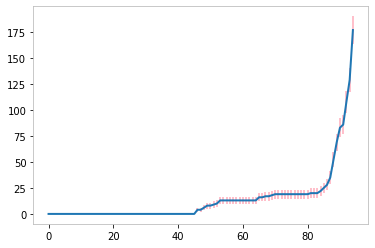

In [172]:
dn = np.sqrt(y)
fig_SU_1 = plt.errorbar(x, y, yerr=dn, ecolor='pink')

same graph in log scale:

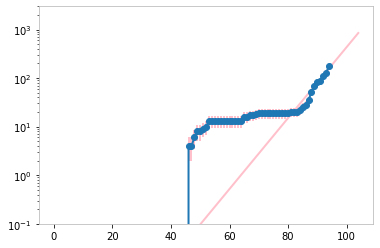

In [173]:
plt.errorbar(x, y, yerr=dn, ecolor='pink', marker='o')
plt.plot(linx, f, ms=1, color='pink')
plt.yscale('log')
log_plot = plt.ylim(0.1, 3000)

The uncertainty bars show the range $ +/- \Delta(n) $ around the central value $ n $. The log scale makes it look asymmetric but they are symmetric. Uncertainties for small values look bigger, this is due to the log scale, in absolute terms there are smaller. The exponential model is a straight line in the above graph, and the line fit should take in to account the uncertainties on count. 

The fitting method that I have used before, by defalut has uncertainties set to 1. In order to introduce uncertainties to the model, the fit has to be redone.

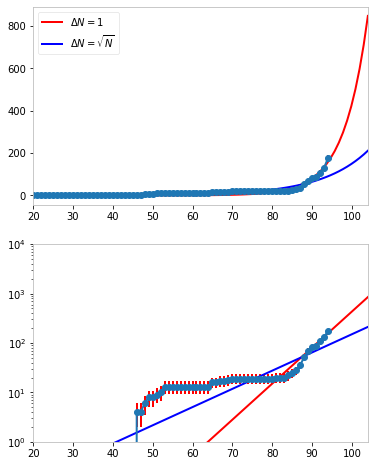

In [174]:
dn[dn==0] = 1
# with uncertainties
pars, cov = curve_fit(expo, x, y, sigma=dn) 
f2 = expo(linx, *pars)
plt.figure(figsize=(6,8))
# lin scale
plt.subplot(2,1,1)
plt.errorbar(x, y, yerr=dn, ecolor='red', marker='o')
plt.plot(linx, f, color='red', label='$\Delta N=1$')
plt.plot(linx, f2, color='blue', label='$\Delta N = \sqrt{N}$')
plt.legend()
plt.xlim(20, linx[-1])
# log scale 
plt.subplot(2,1,2)
plt.errorbar(x, y, yerr=dn, ecolor='red', marker='o')
plt.plot(linx, f, color='red')
plt.plot(linx, f2, color='blue')
plt.ylim(1, 10000)
plt.xlim(20, linx[-1])
plt.yscale('log')

As you see, the fit is now converging on to different parameters with the introduction of uncertainties. This to be expected as the uncertainties matters for all values and not only for the output values of the initial function.

***

## The Covariance Matrix 

In [175]:
pars, cov = curve_fit(expo, x, y, sigma=dn)

The computations that have been carried out so far, provides a way for me to get the parameters from the fit. There is another piece of information that can be extracted from the fit, that is the covariance matrix.

The model fitting can be thought of as a sort of a minimization process. A cost function is minimized as a function of $ a $ and $ b $. When the rate hits zero, which will be the minimal/optimal values for $ a $ and $ b $ the process is terminated.

The covariance matrix, somewhat embodies the shape of this minimizing function at the epic center of the functin.

The cost function's profile in terms of $ (a, b) $ is shown below:

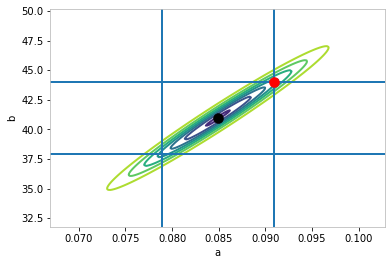

In [176]:
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
import math
a0, b0 = pars
siga, sigb = np.sqrt(np.diag(cov))
linx = np.linspace(a0-3*siga, a0+3*siga, 201)
liny = np.linspace(b0-3*sigb, b0+3*sigb, 201)
x_a,y_a = np.meshgrid(linx,liny)
cost = - multivariate_normal.pdf(np.dstack([x_a,y_a]), 
                                 mean=pars, 
                                 cov=cov)
plt.contour(x_a,y_a,cost, zorder=0)
plt.scatter(a0, b0, marker='o', color='black', 
            s=100, zorder=2)
plt.scatter(a0+siga,b0+sigb, marker='o', color='red', 
            s=100, zorder=2)
plt.axvline(a0-siga, zorder=1)
plt.axvline(a0+siga, zorder=1)
plt.axhline(b0-sigb, zorder=1)
plt.axhline(b0+sigb, zorder=1)
plt.xlabel('a')
cov_figure = plt.ylabel('b')


Here, the terms in the diagonal describes the variances of $ a $ and $ b $. As before, if we take the square root, then the uncertainties of $ a $ and $ b $ as  estimated by the fit can be extracted from the cost function profile.

$ b $, which is the initiation of the epidemic, as referenced before is determined with a precision of:

In [177]:
print('sigma_b = +- ', sigb)

sigma_b = +-  3.0594046662579353


in the same way, the precision for $ a $:

In [178]:
print('sigma_a = +-', siga)

sigma_a = +- 0.005981960074170864


The covariance of $ a and b $ are from the off-diagonal term. The fact that the profile is tilted means that $ (a, b) $ are dependent on each other and that the covariance is not equal to zero.

We can infer some important points from the profile. The dimension seems to be flat, along teh long axis of the ellipsis. Traelling along this long axis, and whilst moving awat from the central value, the value of the cost function seems to change minimally, the point to make here is that, the fit could have converged to a higher value of $ b $ provided that a higher value of $ a $ is chosen. 

We should go back, as we know $ b $ is the start date for the epidemic and increasing $ b $ means a delay in the epidemic. This amounts to shifting the curve to the right, this has no affect on the shape of the curve. If the curve is translated to the right, note that this is model, not the actual data points, therefore to include the data points from the left of the dataset, we have to increase $ a $. An increase in $ a $, which is the infection rate, will result in a sharper rise.

The following is a comparison between the model and a model with the increased parameter variances. That is $ a = a_{0} + \sigma_{a} $ and $ b = b_{0} + \sigma_{b} $. This marker is indicated in red in the profile.

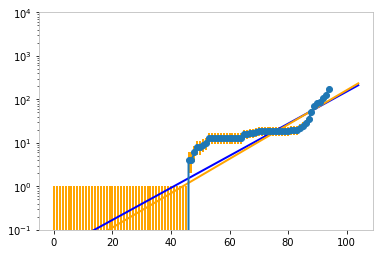

In [179]:
plt.errorbar(x, y, yerr=dn, ecolor='orange', marker='o')
linx = np.linspace(0,x.max()+10,101)
plt.plot(linx, expo(linx, *pars), color='blue')
plt.plot(linx, expo(linx, *(pars + np.sqrt(np.diag(cov)))), 
         color='orange')
plt.yscale('log')
new_plot = plt.ylim(0.1, 10000)

***

## Caculating the Uncertanity Band 

The covariance matrix can be used to calculate the uncertainty band for the fit. Simply put, the next step is to propage the uncertainty which is not in the parameters used to construct the model on to the model itself.

To do this, we have the following non-linear differentiable function of $ a $ and $ b $:

$$ \sigma^2_{f} = \bigg|\frac{\partial f}{\partial a}\bigg|^2 \sigma^2_{a} + 
\bigg|\frac{\partial f}{\partial b}\bigg|^2 \sigma^2_{b} + 2 \frac{\partial f}{\partial a} \frac{\partial f}{\partial b} \sigma_{ab} $$

where:

$ \sigma^2_{f} $:      Squared uncertainty on the function value.

$ \sigma^2_{a}, \sigma^2_{b}, \sigma_{ab} $:    Coefficents of covariance matrix

As stated before, the function for the model is as follows:

$$ f= e^{a(x-b)} $$

We already know that $ a $ and $ b $ are dependent on each other, the derivates will be as follows:

$$ \frac{\partial f}{\partial a} = xf $$

$$ \frac{\partial f}{\partial b} = -af $$

$$ \sigma^2_{f} = f^2(x^2\sigma^2_{a} + a^2\sigma^2_{b} - 2xa\sigma_{ab}) $$

In [185]:
def sigmaf(x, f, a0, cov):
    sigmaa2 = cov[0, 0]
    sigmab2 = cov[1,1]
    sigmaab = cov[0,1]
    return f*np.sqrt(x**2*sigmaa2 + a0**2 * sigmab2 - 2*x*a0*sigmaab)

In [186]:
linx = np.linspace(0,x.max()+10,101)
f = expo(linx, *pars)
df = sigmaf(linx, f, pars[0], cov)

Here is the output I get with the uncertainty band.

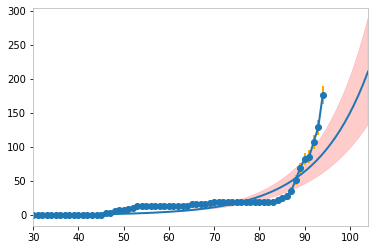

In [187]:
plt.errorbar(x, y, yerr=dn, ecolor='orange', marker='o')
plt.plot(linx, f)
plt.fill_between(linx, f-df, f+df, alpha=0.2, color='red')
fig_plot = plt.xlim(30, x.max()+10)

Here is a plot which compares Maldives with similar countries, it is intersting, now that uncertainty bands have been factored in, the rate for Maldives seems to have gone down as compared to the previous results I had. 


Well the amount of variables that go in to a model like this and also the inter dependencies togather with the varities of affects that each variable can put on the prediciton, I am not certain as to how I can factor all that in to the model. This is why, once I again I should note the difficulties in modeling an epidemic. Well, this model can some what be trusted becasue it models a fast rising function and the uncertainties are mostly arising from the fact that the model is an exponential model but the data fit "resembles" an exponential function. It is not a pure exponential function.


One thing abou the cases here is that, this data is based on confirmed cases, confirmed cases are not the same as infected cases. Here again is a conundrum, the parameters $ a $ and $ b $, because they are dependent on each other, also relies on this data, but the confirmed cases are mostly certainyl from the tests that are carried out. In the population in general the number of cases would be more because testing is always gonna be not enough to cover the whole population (well, at the time of writing this, I saw the news that UAE is going to test all of its citizens for COVID-19, that certainly is phenomenal). 

If you know how to read  log graphs, the following graph looks very scary, it shows that within the extrapolated date frame, we might the number of confirmed cases in Singapore 20 days back in 20 from now. It also means that if we do not follow the strict confinment policies, we could be on our way to reach the numbers of the most severly affected countries within a matter of days.

I am certainly not an expret in modelling disease outbreaks, but this could due to the nature of the spread with respect to the population is very different for a country that is in essense made of other countries (islands). It would be quite interesting to look at how the model fits and how the forecast fits to countries with varying grographical distributions, this could be an idea for further work. 

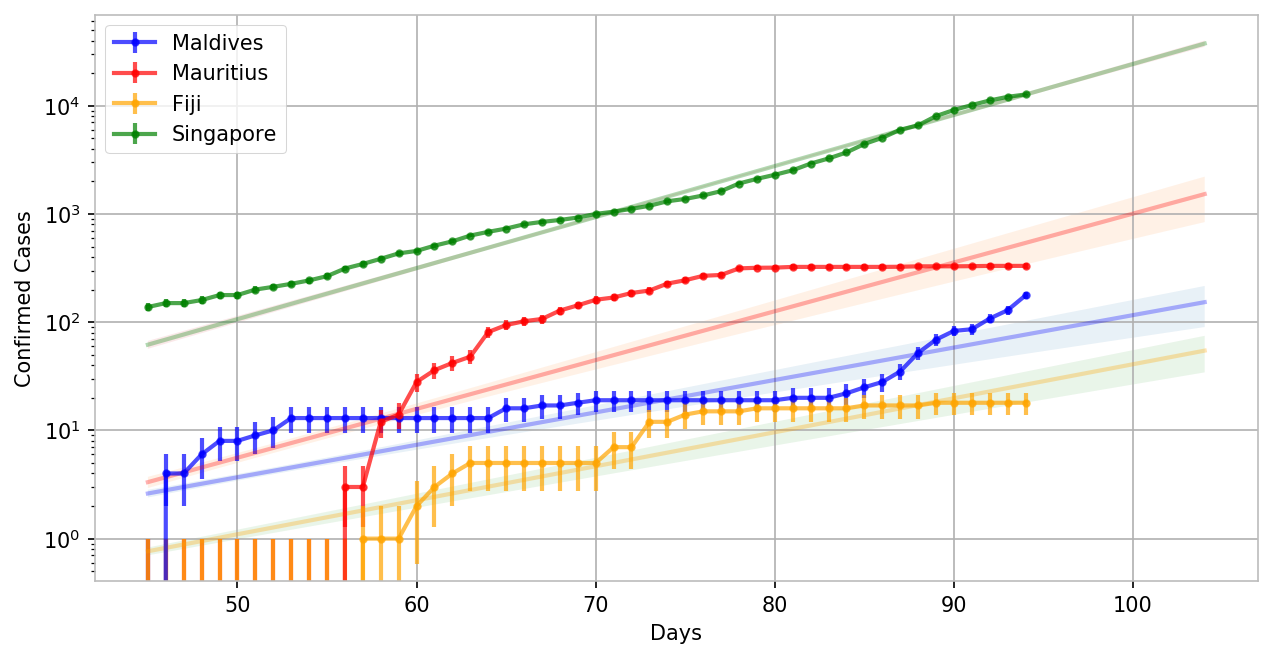

In [188]:
def plot(countries, xrange,
         dtype='Confirmed',
         yrange=None,
         yscale='linear'): 
    '''plot the covid-19 data with an exponential fit.
    - countries: list of countries
    - xrange: fit range, e.g. (30,55)
    - yscale: log or linear
    - yrange: well, y range, useful in log mode.
    '''
    xmin, xmax = xrange
    linx = np.linspace(xmin, xmax, 101)    
    colors = ['blue', 'red', 'orange', 'green']
    for i, country in enumerate(countries): 
        color = colors[i]
        sel = dfall[ (dfall['Country']==country) &
                 (dfall['Quantity']==dtype)]
        y = sel['Counts'][xmin:xmax+1]
        x = np.arange(len(y))+xmin
        syp = np.sqrt(y)
        syp[syp==0]=1
        plt.errorbar(x, y, yerr=syp, label=country, 
                     alpha=0.7, marker='.', color=color)
        pars, cov = curve_fit(expo, x, y, sigma=syp)
        f = expo(linx, *pars)
        plt.plot(linx, f, 
                 color=color, alpha=0.3)
        df = sigmaf(linx, f, pars[0], cov)
        bandp = f+df
        bandm = f-df
        plt.fill_between(linx, bandm, bandp, alpha=0.1)
    plt.legend(loc='upper left')
    plt.xlabel('Days')
    plt.ylabel('Confirmed Cases')
    plt.yscale(yscale)
    if yrange: 
        plt.ylim(*yrange)
    plt.grid()


plt.figure(dpi=150, figsize=(10,5))
plot(['Maldives', 'Mauritius', 'Fiji', 'Singapore'], 
     dtype='Confirmed',
     xrange=(45, x.max()+10),
     yscale='log')

***

xaid.asad@gmail.com | Copyrights. All rights reserved. 2020